In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [0]:
df = pd.read_csv('/dbfs/FileStore/shared_uploads/ana.p.rossi.menezes@avanade.com/Tabela_Fake_Produtos_Vendas.csv', encoding = 'latin', sep=';')
df.head()

,Nome,Sobrenome,Genero,Idade,Email,Profissao,Salario,Estado civil,Cidade,Estado,UF,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,Data da transacao,Agrupamento da transacao,Valor da transacao
0,Amy,Rogers,Feminino,27,a.rogers@hotmail.com,Professor,3267,Divorciado,Luisburgo,Minas Gerais,MG,8748,3054,0.65,NAO,NAO,2022-01-30,Esporte e Lazer,978
1,Florrie,Hawkins,Feminino,22,f.hawkins@hotmail.com,Produtor,4551,Casado,Palmeirina,Pernambuco,PE,13607,11181,0.18,NAO,NAO,2022-01-29,Alimentos e Bebidas,550
2,Daisy,Elliott,Feminino,29,d.elliott@hotmail.com,Florista,9698,Viuvo,Ibiara,Paraiba,PB,24537,18978,0.23,NAO,SIM,2022-02-27,Eletrodomesticos,2507
3,Gianna,Campbell,Feminino,27,g.campbell@hotmail.com,Interprete,592,Casado,Colinas,Maranhao,MA,1658,441,0.73,NAO,SIM,2022-02-14,Posto de gasolina,556
4,Victor,Craig,Masculino,27,v.craig@hotmail.com,Mecanico,1782,Viuvo,Malhador,Sergipe,SE,4228,4090,0.03,SIM,SIM,2022-02-04,Alimentos e Bebidas,2404


In [0]:
df['Data da transacao'] = pd.DatetimeIndex(df['Data da transacao'])

df_f = df['Ano-Mes'] = df['Data da transacao'].dt.strftime('%m-%Y')

df_f = df.groupby(['Nome','Sobrenome','Idade','Estado civil','Salario','Limite total','Limite disponivel','Limite utilizado_p','Seguro Auto','Seguro Residencial','Ano-Mes']).agg({'Valor da transacao':'sum'}).reset_index()

df_f = df_f.pivot(index=['Nome','Sobrenome','Idade','Estado civil','Salario','Limite total','Limite disponivel','Limite utilizado_p','Seguro Auto','Seguro Residencial'], columns='Ano-Mes', values='Valor da transacao').fillna(0).reset_index()

df_f.head()

Ano-Mes,Nome,Sobrenome,Idade,Estado civil,Salario,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,...,03-2023,04-2022,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022
0,Abigail,Brooks,29,Viuvo,7411,19986,19355,0.03,SIM,NAO,...,5120.0,3121.0,0.0,0.0,5348.0,0.0,3802.0,6980.0,4037.0,0.0
1,Abigail,Cameron,69,Divorciado,825,1419,1091,0.23,NAO,NAO,...,358.0,570.0,0.0,171.0,208.0,285.0,483.0,0.0,0.0,1014.0
2,Abigail,Carroll,87,Viuvo,5471,10368,4961,0.52,SIM,SIM,...,0.0,0.0,0.0,0.0,1273.0,0.0,0.0,0.0,0.0,7474.0
3,Abigail,Clark,22,Divorciado,7026,17597,14518,0.17,SIM,NAO,...,4411.0,4962.0,8205.0,5482.0,1269.0,0.0,0.0,2833.0,3645.0,10017.0
4,Abigail,Douglas,22,Divorciado,5222,12544,7303,0.42,SIM,NAO,...,0.0,3609.0,2306.0,0.0,1391.0,0.0,1443.0,0.0,0.0,0.0


In [0]:
input_01 = []
input_02 = []
input_03 = []
input_04 = []
input_05 = []
output_real = []

for indice, linha in df_f.iterrows():
    #1º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de set/22 com relação a ago/22
    if linha['09-2022'] > linha['08-2022']:
        input_01.append(1)
    else:
        input_01.append(0)
    #2º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de out/22 com relação a set/22
    if linha['10-2022'] > linha['09-2022']:
        input_02.append(1)
    else:
        input_02.append(0)
    #3º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de nov/22 com relação a out/22
    if linha['11-2022'] > linha['10-2022']:
        input_03.append(1)
    else:
        input_03.append(0)
    #4º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de dez/22 com relação a nov/22
    if linha['12-2022'] > linha['11-2022']:
        input_04.append(1)
    else:
        input_04.append(0)
    #5º ponto da análise - Se o cliente aumentou a utilização do seu cartão no mês de jan/23 com relação a dez/22
    if linha['01-2023'] > linha['12-2022']:
        input_05.append(1)
    else:
        input_05.append(0)
    #indicador que será utilizado como comparador
    if linha['02-2023'] > linha['01-2023']:
        output_real.append(1)
    else:
        output_real.append(0)
#saída do 1º input
df_f['Input_01'] = input_01
#saída do 2º input
df_f['Input_02'] = input_02
#saída do 3º input
df_f['Input_03'] = input_03
#saída do 4º input
df_f['Input_04'] = input_04
#saída do 5º input
df_f['Input_05'] = input_05
#1º neuronio
#definição do 1º peso inicial
df_f['N1_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N1_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N1_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N1_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N1_Weight_05'] = 0.0
#definição do bias
N1_Bias = 0.0
#2º neuronio
#definição do 1º peso inicial
df_f['N2_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N2_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N2_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N2_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N2_Weight_05'] = 0.0
#definição do bias
N2_Bias = 0.1
#3º neuronio
#definição do 1º peso inicial
df_f['N3_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N3_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N3_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N3_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N3_Weight_05'] = 0.0
#definição do bias
N3_Bias = 0.2
#4º neuronio
#definição do 1º peso inicial
df_f['N4_Weight_01'] = 0.0
#definição do 2º peso inicial
df_f['N4_Weight_02'] = 0.0
#definição do 3º peso inicial
df_f['N4_Weight_03'] = 0.0
#definição do 4º peso inicial
df_f['N4_Weight_04'] = 0.0
#definição do 5º peso inicial
df_f['N4_Weight_05'] = 0.0
#definição do bias
N4_Bias = 0.3
#saída do resultado real analisado com base no histórico
df_f['Output_Real'] = output_real
#resultado do qual será analisado
df_f['Resultado_Final'] = 0

#traz uma amostra dos dados inseridos
df_f.head()


Ano-Mes,Nome,Sobrenome,Idade,Estado civil,Salario,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,...,N3_Weight_05,N3_Weight_06,N4_Weight_01,N4_Weight_02,N4_Weight_03,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final
0,Abigail,Brooks,29,Viuvo,7411,19986,19355,0.03,SIM,NAO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,Abigail,Cameron,69,Divorciado,825,1419,1091,0.23,NAO,NAO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,Abigail,Carroll,87,Viuvo,5471,10368,4961,0.52,SIM,SIM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,Abigail,Clark,22,Divorciado,7026,17597,14518,0.17,SIM,NAO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,Abigail,Douglas,22,Divorciado,5222,12544,7303,0.42,SIM,NAO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [0]:
#Faz uma cópia e não um ponteiro para a tabela a ser minerada
df_f2 = df_f.copy()

#define a quantidade máxima de épocas para o cálculo do peso, caso contrário, será abortado
qtd_epocas_max = 10

#define a limiar de ativação
limiar_ativacao = 0.5

#define a variável de seleção final
retorno_resultado = 0

#função de ativação
def ativacao(pesado_soma):
    if pesado_soma >= limiar_ativacao:
        return 1
    else:
        return 0
#função de ativação

#função de incremento da taxa de aprendizagem
taxa_de_aprendizagem = 0.1

def atualizacao_peso(peso_atual,entrada,erro):
    peso_novo = 0
    peso_novo = peso_atual + (taxa_de_aprendizagem*entrada*erro)
    return peso_novo
    
#função de incremento da taxa de aprendizagem

#função que calcula o erro
def atualizacao_erro(output_real, output_calculado):
    erro_novo = 0.0
    erro_novo = abs(output_real - output_calculado)
    return erro_novo
#função que calcula o erro

#função de multiplicação dos pesos
def perceptron(entrada,output_real,peso,bias):
    #definição do erro
    erro = 0.0
    
    #definição do produto entre a entrada e o peso
    pesado_soma = 0
    
    #variável de contagem das tentativas
    i = 0
    
    #se o valor ainda não trouxe o próximo do real e se o valor também for igual a 0, daí seguirmos com o cálculo
    while ativacao(pesado_soma)!=output_real and i < qtd_epocas_max:
        #faz a contagem de tentativas
        i = i + 1
        
        for x,w in zip(entrada,peso):
            #faz o cálculo do peso até ser o suficiente
            pesado_soma += (x*w)
            #faz o cálculo do peso até ser o suficiente
        
        #faz a inclusão do bias no cálculo do produto da soma
        pesado_soma = (pesado_soma + bias)
        #faz a inclusão do bias no cálculo do produto da soma
        
        #realiza as atualizações do erro e peso em caso de não existir validação realizada
        if ativacao(pesado_soma)!=output_real:
            #faz o cálculo do erro até ser o suficiente
            erro = atualizacao_erro(output_real,ativacao(pesado_soma))
            #faz o cálculo do erro até ser o suficiente
            
            for index,(x,w) in enumerate(zip(entrada,peso)):
                #Atualiza o novo peso dos indicadores
                peso[index] = atualizacao_peso(w,x,erro)
                #Atualiza o novo peso dos indicadores

                #faço a limpeza do produto da soma para a próxima avaliação
                pesado_soma = 0
        
    return ativacao(pesado_soma),peso #retorna o resultado da ativação e o seu respectivo peso
#função de multiplicação dos pesos

acuracia = []

def analisaNeuronio(col_peso_01,col_peso_02,col_peso_03,col_peso_04,col_peso_05,bias,resultado):
    #percorrer a lista e adiciona os input's e pesos
    ret_perceptron = []
    res_analise = []
    res_peso_total = []
    res_peso_01 = []
    res_peso_02 = []
    res_peso_03 = []
    res_peso_04 = []
    res_peso_05 = []

    #faço o 1º neurônio realizar sua análise
    for indice, linha in df_f2.iterrows():
        #resultado real analisado com base no histórico
        res_real = [linha['Output_Real']]
        #entradas padrão
        x_entrada = [linha['Input_01'],linha['Input_02'],linha['Input_03'],linha['Input_04'],linha['Input_05']]
        #pesos do 1º neurônio
        w_peso = [linha[col_peso_01],linha[col_peso_02],linha[col_peso_03],linha[col_peso_04],linha[col_peso_05]]

        #saida dos resultados
        ret_perceptron.append(perceptron(x_entrada,linha['Output_Real'],w_peso,bias))
        res_analise.append(ret_perceptron[indice][0])
        res_peso_total.append(ret_perceptron[indice][1])
        res_peso_01.append(res_peso_total[indice][0])
        res_peso_02.append(res_peso_total[indice][1])
        res_peso_03.append(res_peso_total[indice][2])
        res_peso_04.append(res_peso_total[indice][3])
        res_peso_05.append(res_peso_total[indice][4])
    df_f2[resultado] = res_analise
    df_f2[col_peso_01] = res_peso_01
    df_f2[col_peso_02] = res_peso_02
    df_f2[col_peso_03] = res_peso_03
    df_f2[col_peso_04] = res_peso_04
    df_f2[col_peso_05] = res_peso_05
    #preenche com o indicador de acurácia que será o utilizado para definir qual o melhor neurônio a ser utilizado no final
    acuracia.append(accuracy_score(df_f2['Output_Real'], df_f2[resultado]))
    #traz a o resultado do neurônio que tem maior acurácia
    if acuracia[len(acuracia)-1] >= acuracia[len(acuracia)-2]:
        df_f2['Resultado_Final'] = res_analise
    else:
        df_f2['Resultado_Final'] = res_analise
    
#processa o 1º neurônio
analisaNeuronio('N1_Weight_01','N1_Weight_02','N1_Weight_03','N1_Weight_04','N1_Weight_05',N1_Bias,'N1_Resultado')
#processa o 2º neurônio
analisaNeuronio('N2_Weight_01','N2_Weight_02','N2_Weight_03','N2_Weight_04','N2_Weight_05',N2_Bias,'N2_Resultado')
#processa o 3º neurônio
analisaNeuronio('N3_Weight_01','N3_Weight_02','N3_Weight_03','N3_Weight_04','N3_Weight_05',N3_Bias,'N3_Resultado')
#processa o 4º neurônio
analisaNeuronio('N4_Weight_01','N4_Weight_02','N4_Weight_03','N4_Weight_04','N4_Weight_05',N4_Bias,'N4_Resultado')

#traz uma amostra dos resultados
df_f2.head()

Ano-Mes,Nome,Sobrenome,Idade,Estado civil,Salario,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,...,N4_Weight_03,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final,N1_Resultado,N2_Resultado,N3_Resultado,N4_Resultado
0,Abigail,Brooks,29,Viuvo,7411,19986,19355,0.03,SIM,NAO,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,Abigail,Cameron,69,Divorciado,825,1419,1091,0.23,NAO,NAO,...,0.0,0.1,0.0,0.0,1,1,1,1,1,1
2,Abigail,Carroll,87,Viuvo,5471,10368,4961,0.52,SIM,SIM,...,0.0,0.2,0.0,0.0,1,1,1,1,1,1
3,Abigail,Clark,22,Divorciado,7026,17597,14518,0.17,SIM,NAO,...,0.1,0.1,0.0,0.0,1,1,1,1,1,1
4,Abigail,Douglas,22,Divorciado,5222,12544,7303,0.42,SIM,NAO,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [0]:
#apresenta novos dados ao modelo para entender se ele vai ser eficaz na propagação e compactuar com os devidos padrões sinalizados
output_extra = []
for indice, linha in df_f2.iterrows():
    if linha['03-2023'] > linha['02-2023']:
        output_extra.append(1)
    else:
        output_extra.append(0)

#saída do output_extra
df_f2['Output_Extra'] = output_extra

#traz uma amostra das informações inseridas
df_f2.head()

Ano-Mes,Nome,Sobrenome,Idade,Estado civil,Salario,Limite total,Limite disponivel,Limite utilizado_p,Seguro Auto,Seguro Residencial,...,N4_Weight_04,N4_Weight_05,N4_Weight_06,Output_Real,Resultado_Final,N1_Resultado,N2_Resultado,N3_Resultado,N4_Resultado,Output_Extra
0,Abigail,Brooks,29,Viuvo,7411,19986,19355,0.03,SIM,NAO,...,0.0,0.0,0.0,0,0,0,0,0,0,1
1,Abigail,Cameron,69,Divorciado,825,1419,1091,0.23,NAO,NAO,...,0.1,0.0,0.0,1,1,1,1,1,1,1
2,Abigail,Carroll,87,Viuvo,5471,10368,4961,0.52,SIM,SIM,...,0.2,0.0,0.0,1,1,1,1,1,1,0
3,Abigail,Clark,22,Divorciado,7026,17597,14518,0.17,SIM,NAO,...,0.1,0.0,0.0,1,1,1,1,1,1,1
4,Abigail,Douglas,22,Divorciado,5222,12544,7303,0.42,SIM,NAO,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [0]:
#matriz de confusão
print('Matrizes de confusão:')
print('Resultado final ',pd.crosstab(df_f2['Output_Real'],df_f2['Resultado_Final'], rownames=['Real'], colnames=['Predito'], margins=True))
print('----------------------------------')
print('Resultado novo ',pd.crosstab(df_f2['Resultado_Final'],df_f2['Output_Extra'], rownames=['Real'], colnames=['Predito'], margins=True))
print('----------------------------------')
#acurácia = é a média global do acerto do modelo após a classificação
print('Acurácias:')
print('Resultado final ',accuracy_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ',accuracy_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')
#precisão = é a informação de quantas observações o modelo classificou de maneira correta
print('Precisões:')
print('Resultado final ', precision_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ', precision_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')
#recall = analisa na base quantos realmente o modelo conseguiu prever com aumento no mês seguinte de utilização
print('Recalls:')
print('Resultado final ', recall_score(df_f2['Output_Real'], df_f2['Resultado_Final']))
print('----------------------------------')
print('Resultado novo ', recall_score(df_f2['Resultado_Final'], df_f2['Output_Extra']))
print('----------------------------------')

Matrizes de confusão:
Resultado final  Predito     0     1   All
Real                     
0        2361     0  2361
1           0  1839  1839
All      2361  1839  4200
----------------------------------
Resultado novo  Predito     0     1   All
Real                     
0        1132  1229  2361
1         953   886  1839
All      2085  2115  4200
----------------------------------
Acurácias:
Resultado final  1.0
----------------------------------
Resultado novo  0.4804761904761905
----------------------------------
Precisões:
Resultado final  1.0
----------------------------------
Resultado novo  0.4189125295508274
----------------------------------
Recalls:
Resultado final  1.0
----------------------------------
Resultado novo  0.4817835780315389
----------------------------------


Tamanho da amostra que precisamos:  365
Out[33]: Text(0, 0.5, 'Frequência')

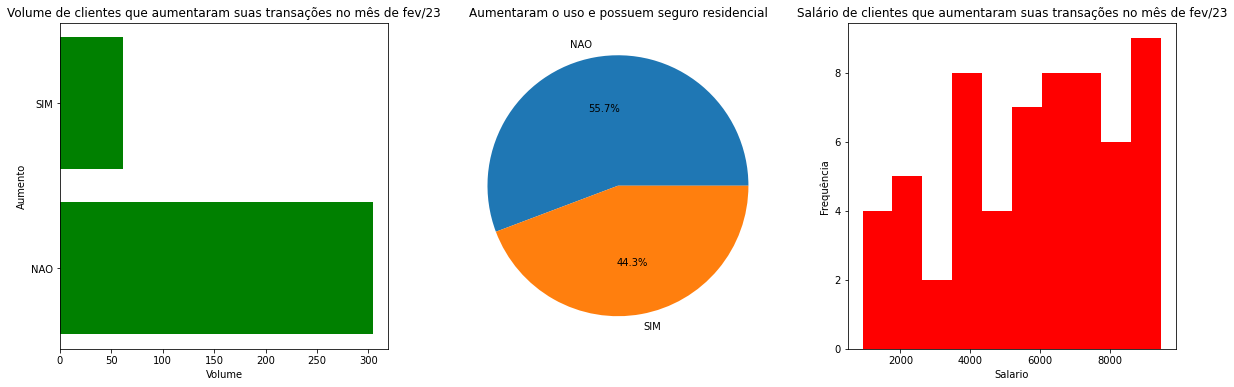

In [0]:
#Definição do tamanho da população mínima para análise dos Input's (Amostragem simples randomizada)
def tamanhoAmostra(e,N):
    n = (N / (1 + (N*(e**2))))
    return (n)
e_ = 0.05 #Erro amostral de 5%
N_ = len(df_f.index)
qtd_amostra = int(tamanhoAmostra(e_, N_))
print('Tamanho da amostra que precisamos: ',qtd_amostra)

df_amostra = df_f.sample(qtd_amostra)
#Definição do tamanho da população mínima para análise dos Input's (Amostragem simples randomizada)

#tamanho da figura
plt.figure(figsize = (20,6))

#Insere um indicador que será utilizado a seguir
aumento = []
for indice, linha in df_amostra.iterrows():
    if linha['03-2023'] > linha['02-2023']:
        aumento.append('SIM')
    else:
        aumento.append('NAO')
df_amostra2 = df_amostra
df_amostra2['Aumento'] = aumento
#Insere um indicador que será utilizado a seguir

###################Gráfico de barra###################
df_amostra3 = df_amostra2.groupby(['Aumento']).agg({'Nome':'count'}).reset_index()

#subplot
plt.subplot(1, 3, 1)
plt.barh(df_amostra3['Aumento'],df_amostra3['Nome'],color='green')
#define titulo
plt.title('Volume de clientes que aumentaram suas transações no mês de fev/23')
#define nome a mostrar no eixo x
plt.xlabel('Volume')
#define nome a mostrar no eixo y
plt.ylabel('Aumento')
###################Gráfico de barra###################

###################Gráfico de pizza###################
df_amostra3 = df_amostra2.groupby(['Seguro Residencial','Aumento']).agg({'Nome':'count'}).reset_index()
df_amostra3 = df_amostra3.pivot(index=['Seguro Residencial'], columns='Aumento', values='Nome').fillna(0).reset_index()

#subplot
plt.subplot(1, 3, 2)
data = df_amostra3['SIM']
plt.pie(data, labels = df_amostra3['Seguro Residencial'] , autopct='%1.1f%%')
plt.title('Aumentaram o uso e possuem seguro residencial')
###################Gráfico de pizza###################

###################Gráfico de histograma###################
df_amostra3 = df_amostra2[df_amostra2['Aumento'] == 'SIM']
df_amostra3
#subplot
plt.subplot(1, 3, 3)
#define X e o histograma
plt.hist(df_amostra3['Salario'], color = 'red')
#define título
plt.title('Salário de clientes que aumentaram suas transações no mês de fev/23')
#define nome a mostrar no eixo x
plt.xlabel('Salario')
#define nome a mostrar no eixo y
plt.ylabel('Frequência')
###################Gráfico de histograma###################